In [24]:
"""
try face tl_gan using stylegan model, modified from
~https://drive.google.com/drive/folders/1A79qKDTFp6pExe4gTSgBsEOkxwa2oes_~
"""

"""
prerequsit: before running the code, download pre-trained model to project_root/asset_model/
pretrained model download url: https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ
model name: 
karras2019stylegan-ffhq-1024x1024.pkl
"""

import os
import sys
import time
import pickle
import numpy as np
import tensorflow as tf
import PIL.Image
import datetime
import matplotlib.pyplot as plt
import glob
""" make sure this notebook is running from root directory """
while os.path.basename(os.getcwd()) in ('notebooks', 'src', 'tl_gan'):
    os.chdir('..')
assert ('README.md' in os.listdir('./')), 'Can not find project root, please cd to project root before running the following code'


# path to model code and weight
path_style_gan_code= './src/model/stylegan'
path_model = './asset_model/karras2019stylegan-ffhq-1024x1024.pkl'
sys.path.append(path_style_gan_code)

# path to model generated results
path_gen_sample = './asset_results/stylegan_ffhq_sample_pkl/'
if not os.path.exists(path_gen_sample):
    os.mkdir(path_gen_sample)
path_gan_explore = './asset_results/stylegan_ffhq_explore/'
if not os.path.exists(path_gan_explore):
    os.mkdir(path_gan_explore)

In [4]:
""" gen samples and save as pickle """

n_batch = 32
batch_size = 4
"""
with tf.Session() as sess:

    try:
        with open(path_model, 'rb') as file:
            G, D, Gs = pickle.load(file)
    except FileNotFoundError:
        print('before running the code, download pre-trained model to project_root/asset_model/')
        raise

    # Generate latent vectors.
    # latents = np.random.RandomState(1000).randn(1000, *Gs.input_shapes[0][1:]) # 1000 random latents
    # latents = latents[[477, 56, 83, 887, 583, 391, 86, 340, 341, 415]] # hand-picked top-10

    for i_batch in range(n_batch):
        try:
            i_sample = i_batch * batch_size

            tic = time.time()

            latents = np.random.randn(batch_size, *Gs.input_shapes[0][1:])

            # Generate dummy labels (not used by the official networks).
            labels = np.zeros([latents.shape[0]] + Gs.input_shapes[1][1:])

            # Run the generator to produce a set of images.
            images = Gs.run(latents, labels)

            images = np.clip(np.rint((images + 1.0) / 2.0 * 255.0), 0.0, 255.0).astype(np.uint8)  # [-1,1] => [0,255]
            images = images.transpose(0, 2, 3, 1)  # NCHW => NHWC

            images = images[:, 4::8, 4::8, :]

            with open(os.path.join(path_gen_sample, 'stylegan_ffhq_{:0>6d}.pkl'.format(i_sample)), 'wb') as f:
                pickle.dump({'z': latents, 'x': images}, f)

            toc = time.time()
            print(i_sample, toc-tic)

        except Exception as e:
            print(str(e))
            print('error in {}'.format(i_sample))

"""
""" view generated samples """
yn_view_sample = True
if yn_view_sample:
    with open(os.path.join(path_gen_sample, 'stylegan_ffhq_{:0>6d}.pkl'.format(0)), 'rb') as f:
        temp = pickle.load(f)

    import matplotlib.pyplot as plt
    plt.imshow(temp['x'][0]); plt.show()

['LICENSE', 'asset_results', '.git', 'README.md', 'static', 'src', 'asset_model', 'data', 'unpickle.py', 'download_ffhq.py', 'requirements.txt', '.gitignore', '.ipynb_checkpoints', 'requirements_with_version.txt']
0 8.370021343231201
4 0.5504050254821777
8 0.5493936538696289
12 0.5490410327911377
16 0.5451216697692871
20 0.5487918853759766
24 0.5480062961578369
28 0.5477864742279053
32 0.5444788932800293
36 0.5517153739929199
40 0.5497095584869385
44 0.5481741428375244
48 0.5483088493347168
52 0.5493712425231934
56 0.5505046844482422
60 0.5433504581451416
64 0.544126033782959
68 0.5516507625579834
72 0.5493083000183105
76 0.5493965148925781
80 0.5477986335754395
84 0.549973726272583
88 0.5477249622344971
92 0.5455918312072754
96 0.5469248294830322
100 0.5493180751800537
104 0.5496137142181396
108 0.5519258975982666
112 0.5492658615112305
116 0.5511448383331299
120 0.5489931106567383
124 0.5494067668914795


<Figure size 640x480 with 1 Axes>

In [33]:
yn_view_sample = True
if yn_view_sample:
    with open(os.path.join(path_gen_sample, 'stylegan_ffhq_{:0>6d}.pkl'.format(0)), 'rb') as f:
        temp = pickle.load(f)

    import matplotlib.pyplot as plt
    num_faces = 4
    for i in range(num_faces):
        #plt.imshow(temp['x'][i])
        #plt.show()
        pass
print(*Gs.input_shapes[0][1:])

512


In [2]:
""" play with the latent space """
sess = tf.InteractiveSession()

try:
    with open(path_model, 'rb') as file:
        G, D, Gs = pickle.load(file)
except FileNotFoundError:
    print('before running the code, download pre-trained model to project_root/asset_model/')
    raise

In [25]:
## load feature directions
path_feature_direction = './asset_results/stylegan_feature_direction_40'

pathfile_feature_direction = glob.glob(os.path.join(path_feature_direction, 'feature_direction_*.pkl'))[-1]

with open(pathfile_feature_direction, 'rb') as f:
    feature_direction_name = pickle.load(f)

feature_direction = feature_direction_name['direction']
feature_name = feature_direction_name['name']

(1, 512)
0.0009806928697977347 0.04418329142894549
-0.4983558002226494 0.17676904878143163 0.03708814819769268 0.9935972040730867


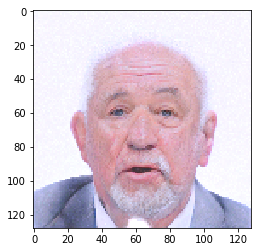

1 0.32125115394592285


In [127]:
i_batch = 1
batch_size = 1
i_sample = i_batch * batch_size
tic = time.time()
"""
['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald',
 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks',
 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']
"""
#latents = np.random.randn(batch_size, *Gs.input_shapes[0][1:])
latents = -0.5 * np.ones((batch_size, *Gs.input_shapes[0][1:]))
print(latents.shape)
latents[0] += feature_direction[:, 0 + 5 * 5 - 1] * -4
latents[0] /= 1
print(feature_direction[:, 0].mean(), feature_direction[:, 0].std())
print(latents.mean(), latents.std(), np.absolute(latents).min(), np.absolute(latents).max())
# Generate dummy labels (not used by the official networks).
labels = np.zeros([latents.shape[0]] + Gs.input_shapes[1][1:])

# Run the generator to produce a set of images.
images = Gs.run(latents, labels)
images = np.clip(np.rint((images + 1.0) / 2.0 * 255.0), 0.0, 255.0).astype(np.uint8)  # [-1,1] => [0,255]
images = images.transpose(0, 2, 3, 1)  # NCHW => NHWC
images = images[:, 4::8, 4::8, :]

plt.imshow(images[0]); plt.show()
toc = time.time()
print(i_sample, toc-tic)

(1, 128, 128, 3)


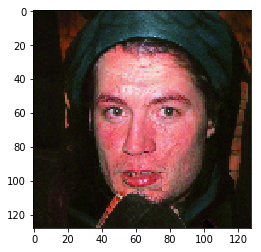

In [35]:
with open(os.path.join(path_gen_sample, 'stylegan_ffhq_{:0>6d}.pkl'.format(i_sample)), 'wb') as f:
    pickle.dump({'z': latents, 'x': images}, f)

""" view generated samples """
yn_view_sample = True
if yn_view_sample:
    with open(os.path.join(path_gen_sample, 'stylegan_ffhq_{:0>6d}.pkl'.format(i_sample)), 'rb') as f:
        temp = pickle.load(f)
    print(temp['x'].shape)

    import matplotlib.pyplot as plt
    plt.imshow(temp['x'][0]); plt.show()

In [118]:
""" generation of faces from one center image, and move along every feature axis """

import os
import glob
import sys
import numpy as np
import time
import pickle
import datetime
import tensorflow as tf
import PIL


## load feature directions
path_feature_direction = './asset_results/stylegan_feature_direction_40'

pathfile_feature_direction = glob.glob(os.path.join(path_feature_direction, 'feature_direction_*.pkl'))[-1]

with open(pathfile_feature_direction, 'rb') as f:
    feature_direction_name = pickle.load(f)

feature_direction = feature_direction_name['direction']
feature_name = feature_direction_name['name']

##
""" test_discovered features """

# path to model code and weight
path_pg_gan_code = './src/model/pggan'
path_model = './asset_model/karras2019stylegan-ffhq-1024x1024.pkl'
sys.path.append(path_pg_gan_code)

path_gan_explore = './asset_results/pggan_celeba_feature_axis_explore/'
if not os.path.exists(path_gan_explore):
    os.mkdir(path_gan_explore)

""" play with the latent space """
sess = tf.InteractiveSession()

try:
    with open(path_model, 'rb') as file:
        G, D, Gs = pickle.load(file)
except FileNotFoundError:
    print('before running the code, download pre-trained model to project_root/asset_model/')
    raise

batch_size = 7

##
latents_c = np.random.randn(1, *Gs.input_shapes[0][1:])
magnitude = 3
for i_feature in range(feature_direction.shape[1]):
    latents_0 = latents_c - feature_direction[:, i_feature][None, :]*magnitude
    latents_1 = latents_c + feature_direction[:, i_feature][None, :]*magnitude

    print(np.mean(latents_0-latents_1)**2)

    latents = np.random.randn(batch_size, *Gs.input_shapes[0][1:])
    for i_alpha, alpha in enumerate(np.linspace(0, 1, batch_size)):
        latents[i_alpha, :] = latents_0[0]*(1-alpha) + latents_1[0]*alpha

    # Generate dummy labels (not used by the official networks).
    labels = np.zeros([latents.shape[0]] + Gs.input_shapes[1][1:])

    # Run the generator to produce a set of images.
    images = Gs.run(latents, labels)

    images = np.clip(np.rint((images + 1.0) / 2.0 * 255.0), 0.0, 255.0).astype(np.uint8)  # [-1,1] => [0,255]
    images = images.transpose(0, 2, 3, 1)  # NCHW => NHWC

    # downsize images
    images = images[:, 2::4, 2::4]

    time_str = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

    # Save images as PNG.
    for idx in range(images.shape[0]):
        PIL.Image.fromarray(images[idx], 'RGB')\
            .save(os.path.join(path_gan_explore,
                               'img_{}_{}_{}_{}.png'.format(time_str, i_feature, feature_name[i_feature], idx)))
    np.save(os.path.join(path_gan_explore, 'img_{}_{}.pkl'.format(time_str, i_feature)), labels)



/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


3.462330617539629e-05
9.0965747533149e-05
4.585347602113814e-06
3.711234427095163e-05
2.9886894768452847e-05
9.741864601078817e-05
2.7094302439782625e-06
2.628311377686258e-05
1.4699250101358083e-05
6.180700623286896e-06
2.1094510163093056e-06
1.0623045526989262e-05
2.1331535816310083e-05
4.15190118051432e-05
6.058341613216254e-05
0.00022834495922853027
1.2986228003248886e-05
1.1381247559744378e-05
2.788592050194125e-05
4.833160772497693e-05
1.4331235178862525e-05
1.1840325290886579e-08
2.9670667961871584e-05
2.3777546848602004e-06
6.082634042639529e-06
6.959048369253918e-05
1.7014158868294866e-05
2.8419517218946068e-05
2.271026634312505e-05
2.0453661409213867e-06
1.5668148904930147e-06
3.7637816943537936e-05
8.128060441091663e-06
1.3356248822154027e-05
3.6231145875990375e-06
3.8409090204801305e-06
3.576419194545991e-05
2.8320244026802414e-05
8.019023726835172e-06
4.5149099925062654e-05


In [22]:
print(feature_direction.shape, feature_name)
import pandas as pd
fdf = pd.DataFrame(feature_direction[:, :], columns=feature_name[:])

(512, 40) ['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']


In [23]:
fdf.describe()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,...,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,0.000981,-0.001590,-0.000357,0.001015,0.000911,-0.001645,-0.000274,0.000854,0.000639,-0.000414,...,-0.000209,0.001022,-0.000475,0.000609,-0.000317,-0.000327,-0.000997,-0.000887,0.000472,0.001120
std,0.044227,0.044209,0.044236,0.044226,0.044228,0.044207,0.044237,0.044229,0.044233,0.044235,...,0.044237,0.044226,0.044235,0.044233,0.044236,0.044236,0.044226,0.044228,0.044235,0.044223
min,-0.127920,-0.150598,-0.119532,-0.130039,-0.119551,-0.119723,-0.177122,-0.121825,-0.142798,-0.161823,...,-0.133869,-0.128361,-0.114790,-0.135614,-0.123678,-0.150217,-0.127550,-0.118105,-0.129436,-0.145437
25%,-0.028313,-0.030432,-0.028956,-0.029573,-0.026536,-0.031089,-0.028735,-0.031289,-0.027574,-0.028705,...,-0.030428,-0.029045,-0.030559,-0.024424,-0.027873,-0.030712,-0.029811,-0.029601,-0.024685,-0.027631
50%,0.002182,-0.002461,0.000152,-0.001095,0.000698,-0.003264,-0.001990,0.000679,0.000818,0.000301,...,-0.000945,0.002001,-0.002647,0.000433,0.001296,-0.000606,0.001100,0.000033,0.001451,-0.001238
75%,0.030487,0.027932,0.028388,0.031864,0.028866,0.026144,0.034035,0.033477,0.029375,0.026348,...,0.028793,0.031827,0.029196,0.031511,0.028996,0.031961,0.028137,0.026514,0.026108,0.028565
max,0.130242,0.120096,0.131508,0.118357,0.136601,0.105115,0.130999,0.132963,0.152466,0.123415,...,0.125209,0.143824,0.124333,0.121299,0.134957,0.116013,0.125589,0.109582,0.132511,0.146329


In [167]:
"""
pseudocode:
take pairwise dot products
for loop over i and j
"""
dots = np.zeros((feature_direction.shape[1], feature_direction.shape[1]))
for i in range(dots.shape[0]):
    for j in range(dots.shape[1]):
        dots[i, j] = np.dot(feature_direction[:, i], feature_direction[:, j])
print(dots)

correlations = []
for i in range(dots.shape[0]):
    j = dots[i].argsort()[-2]
    correlations.append([feature_name[i], feature_name[j], dots[i, j]])
    #print(correlations[-1])
import pandas as pd
cdf = pd.DataFrame(correlations, columns=['first_feature', 'second_feature', 'correlation'])
print(cdf.sort_values('correlation', ascending=False))

[[ 1.         -0.69912774 -0.60292882 ... -0.84348585  0.89945164
  -0.60418718]
 [-0.69912774  1.          0.60737864 ...  0.81750556 -0.8193215
   0.45489786]
 [-0.60292882  0.60737864  1.         ...  0.7136824  -0.71270715
   0.64267012]
 ...
 [-0.84348585  0.81750556  0.7136824  ...  1.         -0.89663119
   0.4740236 ]
 [ 0.89945164 -0.8193215  -0.71270715 ... -0.89663119  1.
  -0.62165765]
 [-0.60418718  0.45489786  0.64267012 ...  0.4740236  -0.62165765
   1.        ]]
          first_feature     second_feature  correlation
36     Wearing_Lipstick       Heavy_Makeup     0.984792
18         Heavy_Makeup   Wearing_Lipstick     0.984792
13               Chubby        Double_Chin     0.965988
14          Double_Chin             Chubby     0.965988
37     Wearing_Necklace   Wearing_Lipstick     0.946495
34     Wearing_Earrings   Wearing_Necklace     0.934608
3       Bags_Under_Eyes           Big_Nose     0.927122
7              Big_Nose    Bags_Under_Eyes     0.927122
31           

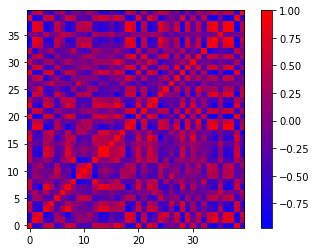

In [146]:
import matplotlib as mpl
from matplotlib import pyplot
import numpy as np

# make values from -5 to 5, for this example
zvals = np.random.rand(100,100)*10-5
# make a color map of fixed colors
cmap = mpl.colors.ListedColormap(['blue','green'])


cmap2 = mpl.colors.LinearSegmentedColormap.from_list('my_colormap',
                                           ['blue','red'],
                                           256)

img2 = pyplot.imshow(dots,interpolation='nearest',
                    cmap = cmap2,
                    origin='lower')

pyplot.colorbar(img2,cmap=cmap2)
